## Training (Use `train.py` instead)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm
# from model import UNetPixelwiseRegression
from unet import UNET
from dataset import CVPDataset
from utils import (
    load_checkpoint,
    save_checkpoint,
    get_loaders,
    check_accuracy,
    save_prediction_as_imgs
)

In [2]:
# Hyperparameters
LEARNING_RATE = 1e-4
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
BATCH_SIZE = 16
NUM_EPOCHS = 30
NUM_WORKERS = 2
IMAGE_HEIGHT = 512
IMAGE_WIDTH = 512
PIN_MEMORY = True
LOAD_MODEL = True
TRAIN_IMG_DIR = "data/train_img_dir/"
TRAIN_GT_DIR = "data/train_gt_dir/"
VAL_IMG_DIR = "data/val_img_dir/"
VAL_GT_DIR = "data/val_gt_dir"
MODEL_STATE_DIR = "model_state/"
PRED_IMG_DIR = "saved_images/" 

In [3]:
def train_func(loader, model, optimizer, loss_fn, scaler):
    loop = tqdm(loader)
    # model = model.float()
    # model.to(device=DEVICE)
    for batch_idx, (data, targets) in enumerate(loop):
        data = data.to(device=DEVICE)
        # print(DEVICE)
        targets = targets.unsqueeze(1).to(device=DEVICE)

        #forward
        with torch.cuda.amp.autocast():
            predictions = model(data.float())
            loss = loss_fn(predictions, targets)

        #backward
        
        optimizer.zero_grad()
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()


        loop.set_postfix(loss=loss.item())


def train_main():
    model = UNET(in_channels=1, out_channels=1).to(DEVICE)
    loss_fn = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    train_loader, val_loader = get_loaders(
        TRAIN_IMG_DIR,
        TRAIN_GT_DIR,
        VAL_IMG_DIR,
        VAL_GT_DIR,
        BATCH_SIZE
    )

    scaler = torch.cuda.amp.GradScaler()
    for epoch in range(NUM_EPOCHS):
        train_func(train_loader, model, optimizer, loss_fn, scaler)

        #save model
        checkpoint = {
            "state_dict": model.state_dict(),
            "optimizer": optimizer.state_dict()
        }
        save_checkpoint(checkpoint, epoch, folder=MODEL_STATE_DIR)

        #check accuracy
        check_accuracy(val_loader, model, device=DEVICE)

        save_prediction_as_imgs(
            val_loader,model,folder=PRED_IMG_DIR,device=DEVICE
        )

In [4]:
train_main()

  0%|          | 0/282 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16, 1, 1, 512, 512])) that is different to the input size (torch.Size([16, 1, 512, 512])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|█████████▉| 281/282 [02:16<00:00,  2.07it/s, loss=0.0216]/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4, 1, 1, 512, 512])) that is different to the input size (torch.Size([4, 1, 512, 512])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 282/282 [02:16<00:00,  2.06it/s, loss=0.0288]


--> Saving Checkpoint to model_state/my_checkpoint_0.pth.tar
MSE : 0.016022847965359688


100%|██████████| 282/282 [02:16<00:00,  2.07it/s, loss=0.0141]


--> Saving Checkpoint to model_state/my_checkpoint_1.pth.tar
MSE : 0.01596893183887005


100%|██████████| 282/282 [02:16<00:00,  2.07it/s, loss=0.0152]


--> Saving Checkpoint to model_state/my_checkpoint_2.pth.tar
MSE : 0.03425037860870361


100%|██████████| 282/282 [02:16<00:00,  2.07it/s, loss=0.0168]


--> Saving Checkpoint to model_state/my_checkpoint_3.pth.tar
MSE : 0.01969018019735813


100%|██████████| 282/282 [02:16<00:00,  2.07it/s, loss=0.0232]


--> Saving Checkpoint to model_state/my_checkpoint_4.pth.tar
MSE : 0.018109049648046494


100%|██████████| 282/282 [02:16<00:00,  2.06it/s, loss=0.019] 


--> Saving Checkpoint to model_state/my_checkpoint_5.pth.tar
MSE : 0.017298229038715363


100%|██████████| 282/282 [02:16<00:00,  2.06it/s, loss=0.0195]


--> Saving Checkpoint to model_state/my_checkpoint_6.pth.tar
MSE : 0.01917525753378868


100%|██████████| 282/282 [02:16<00:00,  2.06it/s, loss=0.0217]


--> Saving Checkpoint to model_state/my_checkpoint_7.pth.tar
MSE : 0.018295111134648323


100%|██████████| 282/282 [02:16<00:00,  2.06it/s, loss=0.0132]


--> Saving Checkpoint to model_state/my_checkpoint_8.pth.tar
MSE : 0.01791321486234665


100%|██████████| 282/282 [02:16<00:00,  2.06it/s, loss=0.0214]


--> Saving Checkpoint to model_state/my_checkpoint_9.pth.tar
MSE : 0.0864265188574791


100%|██████████| 282/282 [02:16<00:00,  2.06it/s, loss=0.0161]


--> Saving Checkpoint to model_state/my_checkpoint_10.pth.tar
MSE : 0.02025061659514904


100%|██████████| 282/282 [02:16<00:00,  2.06it/s, loss=0.0236]


--> Saving Checkpoint to model_state/my_checkpoint_11.pth.tar
MSE : 0.016911491751670837


100%|██████████| 282/282 [02:16<00:00,  2.06it/s, loss=0.0232]


--> Saving Checkpoint to model_state/my_checkpoint_12.pth.tar
MSE : 0.0168765801936388


100%|██████████| 282/282 [02:16<00:00,  2.06it/s, loss=0.0167]


--> Saving Checkpoint to model_state/my_checkpoint_13.pth.tar
MSE : 0.020481720566749573


100%|██████████| 282/282 [02:16<00:00,  2.06it/s, loss=0.0213]


--> Saving Checkpoint to model_state/my_checkpoint_14.pth.tar
MSE : 0.03718925639986992


100%|██████████| 282/282 [02:17<00:00,  2.06it/s, loss=0.0209]


--> Saving Checkpoint to model_state/my_checkpoint_15.pth.tar
MSE : 0.016967197880148888


100%|██████████| 282/282 [02:16<00:00,  2.06it/s, loss=0.0192]


--> Saving Checkpoint to model_state/my_checkpoint_16.pth.tar
MSE : 0.01764799654483795


100%|██████████| 282/282 [02:17<00:00,  2.05it/s, loss=0.0252]


--> Saving Checkpoint to model_state/my_checkpoint_17.pth.tar
MSE : 0.02201499603688717


100%|██████████| 282/282 [02:16<00:00,  2.06it/s, loss=0.0228]


--> Saving Checkpoint to model_state/my_checkpoint_18.pth.tar
MSE : 0.03325904533267021


100%|██████████| 282/282 [02:16<00:00,  2.06it/s, loss=0.021] 


--> Saving Checkpoint to model_state/my_checkpoint_19.pth.tar
MSE : 0.0174039788544178


100%|██████████| 282/282 [02:16<00:00,  2.06it/s, loss=0.0191]


--> Saving Checkpoint to model_state/my_checkpoint_20.pth.tar
MSE : 0.04671843722462654


100%|██████████| 282/282 [02:16<00:00,  2.06it/s, loss=0.0278]


--> Saving Checkpoint to model_state/my_checkpoint_21.pth.tar
MSE : 0.016453074291348457


100%|██████████| 282/282 [02:16<00:00,  2.06it/s, loss=0.0232]


--> Saving Checkpoint to model_state/my_checkpoint_22.pth.tar
MSE : 0.021604396402835846


100%|██████████| 282/282 [02:16<00:00,  2.06it/s, loss=0.0254]


--> Saving Checkpoint to model_state/my_checkpoint_23.pth.tar
MSE : 0.020662948489189148


100%|██████████| 282/282 [02:16<00:00,  2.06it/s, loss=0.0309]


--> Saving Checkpoint to model_state/my_checkpoint_24.pth.tar
MSE : 0.019710687920451164


100%|██████████| 282/282 [02:16<00:00,  2.06it/s, loss=0.0226]


--> Saving Checkpoint to model_state/my_checkpoint_25.pth.tar
MSE : 0.01786991022527218


100%|██████████| 282/282 [02:16<00:00,  2.06it/s, loss=0.0241]


--> Saving Checkpoint to model_state/my_checkpoint_26.pth.tar
MSE : 0.019691675901412964


100%|██████████| 282/282 [02:16<00:00,  2.06it/s, loss=0.0263]


--> Saving Checkpoint to model_state/my_checkpoint_27.pth.tar
MSE : 0.022615650668740273


100%|██████████| 282/282 [02:16<00:00,  2.06it/s, loss=0.0207]


--> Saving Checkpoint to model_state/my_checkpoint_28.pth.tar
MSE : 0.02041942998766899


100%|██████████| 282/282 [02:16<00:00,  2.06it/s, loss=0.0251]


--> Saving Checkpoint to model_state/my_checkpoint_29.pth.tar
MSE : 0.01833396963775158


In [11]:
import torch

# Assuming you have a CUDA device
cuda_device = torch.device('cuda:0')

# Clear CUDA memory
torch.cuda.empty_cache()

## Evaluation

In [1]:
from utils import load_checkpoint
from unet import UNET
import torch
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from PIL import Image
import os

In [2]:
test_model = UNET()
# test_model2 = UNET()

In [3]:
checkpoint_abs_path1 = "model_state/checkpoint_47_least_val_loss.pth.tar"


In [4]:
if torch.cuda.is_available():
    load_checkpoint(torch.load(checkpoint_abs_path1), test_model)
    # load_checkpoint(torch.load(checkpoint_abs_path2), test_model2)
else:
    load_checkpoint(torch.load(checkpoint_abs_path1,
                           map_location=torch.device('cpu')), test_model)
    # load_checkpoint(torch.load(checkpoint_abs_path2,
    #                            map_location=torch.device('cpu')), test_model2)

--> Loading Checkpoint
Loading Complete


In [8]:
def get_test_predictions(test_folder):
    subdirs = [file for file in os.listdir(test_folder)]
    for subrdir in subdirs:
        subdir_path = os.path.join(test_folder,subrdir) 
        if os.path.isdir(subdir_path):
            for file in os.listdir(subdir_path):
                if file.endswith(".png"):
                    file_path = os.path.join(subdir_path, file)
                    image = np.array(Image.open(file_path).convert("L"))
                    image = image/255
                    image = np.reshape(image,(1,1,) + image.shape)
                    img_tensor = torch.from_numpy(image)
                    print(f"--> Getting Prediction for file {file_path} ...")
                    pred1 = test_model(img_tensor.float()).detach().numpy()
                    img_arr = pred1[0,0,:,:]
                    # pred2 = test_model2(img_tensor.float()).detach().numpy()
                    dest_subdir = subdir_path.replace("test","test_preds")
                    if not os.path.exists(dest_subdir):
                        os.makedirs(dest_subdir)
                    dest_path=os.path.join(dest_subdir,file)
                    img_scaled = (img_arr * 255).astype(np.uint8)
                    out_img = Image.fromarray(img_scaled)
                    print(f"--> Saving Image {dest_path}...")
                    out_img.save(dest_path)


In [ ]:
get_test_predictions('data/test/')

In [20]:
def get_masks(image, threshold):
    img_arr = np.array(Image.open(image).convert("L"))
    return (img_arr > threshold).astype((np.uint8))

def load_mask(file_path):
    mask = np.array(Image.open(file_path))
    return mask.astype(np.uint8)

In [46]:

def dice_score(mask1, mask2):
    intersection = np.sum(mask1 * mask2)
    total = np.sum(mask1) + np.sum(mask2)
    dice = (2 * intersection) / (total + 1e-6)  
    dice = np.clip(dice, 0, 1) 
    return dice

def iou_score(mask1, mask2):
    intersection = np.logical_and(mask1, mask2)
    union = np.logical_or(mask1, mask2)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score

In [66]:


def tune_threshold(gt_mask_dir, lower=60, upper=180, step=4):
    iou_tracker = {}
    for threshold in range(lower, upper+1, step):
        cum_iou = 0
        cnt = 0
        subdirs = [file for file in os.listdir(gt_mask_dir)]
        for subrdir in subdirs:
            subdir_path = os.path.join(gt_mask_dir,subrdir) 
            if os.path.isdir(subdir_path):
                for file in os.listdir(subdir_path):
                    if file.endswith(".png"):
                        file_path = os.path.join(subdir_path, file)
                        gt_mask = load_mask(file_path)
                        pred_mask = get_masks(file_path.replace("masks","test_preds"),
                                              threshold)
                        iou = iou_score(gt_mask, pred_mask)
                        cum_iou += iou
                        cnt += 1
            avg_iou = cum_iou/cnt
        iou_tracker[threshold] = avg_iou
    return iou_tracker
        
            
tracker1 = tune_threshold('data/masks/')

In [67]:
tracker1_1 = tune_threshold('data/masks/', lower=65, upper=85, step=1)

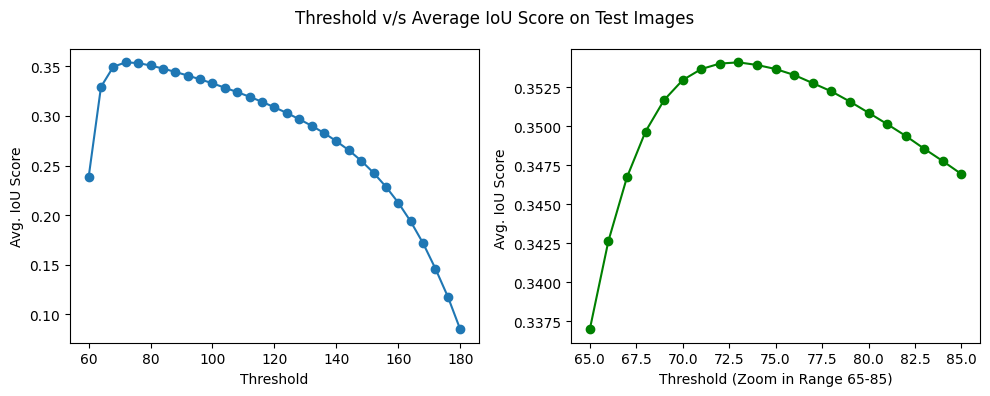

In [99]:

keys = list(tracker1.keys())
values = list(tracker1.values())

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(list(tracker1.keys()), list(tracker1.values()), marker='o', linestyle='-')
# axs[0].set_title('Average IoU Score v/s Threshold Using Test Da')
axs[0].set_xlabel('Threshold')
axs[0].set_ylabel('Avg. IoU Score')


axs[1].plot(list(tracker1_1.keys()), list(tracker1_1.values()), marker='o', linestyle='-', color='green')
# axs[1].set_title('Dictionary 2')
axs[1].set_xlabel('Threshold (Zoom in Range 65-85)')
axs[1].set_ylabel('Avg. IoU Score ')

# title = plt.title('Average IoU Score v/s Threshold Using Test Data')
# title.set_position([0.5, 1.05])
fig.suptitle('Threshold v/s Average IoU Score on Test Images')

plt.tight_layout()
plt.show()

In [74]:
max_key = max(tracker1_1, key=tracker1_1.get)

print(f"Threshold = {max_key} yieils maximum IoU score : {tracker1_1[max_key]}")

Threshold = 73 yieils maximum IoU score : 0.35409131108732306


In [90]:
## save pred masks

folder = 'data/test_preds'
subdirs = [file for file in os.listdir(folder)]
for subrdir in subdirs:
    subdir_path = os.path.join(folder,subrdir) 
    if os.path.isdir(subdir_path):
        for file in os.listdir(subdir_path):
            if file.endswith(".png"):
                file_path = os.path.join(subdir_path, file)
                img_arr = get_masks(file_path,73)
                dest_subdir = subdir_path.replace("test_preds","mask_preds")
                if not os.path.exists(dest_subdir):
                    os.makedirs(dest_subdir)
                dest_path=os.path.join(dest_subdir,file)
                img_scaled = (img_arr * 255).astype(np.uint8)
                out_img = Image.fromarray(img_scaled)
                print(f"--> Saving Image {dest_path}...")
                out_img.save(dest_path)

--> Saving Image data/mask_preds/1/8.png...
--> Saving Image data/mask_preds/1/9.png...
--> Saving Image data/mask_preds/1/10.png...
--> Saving Image data/mask_preds/1/4.png...
--> Saving Image data/mask_preds/1/5.png...
--> Saving Image data/mask_preds/1/7.png...
--> Saving Image data/mask_preds/1/6.png...
--> Saving Image data/mask_preds/1/2.png...
--> Saving Image data/mask_preds/1/3.png...
--> Saving Image data/mask_preds/1/1.png...
--> Saving Image data/mask_preds/4/8.png...
--> Saving Image data/mask_preds/4/9.png...
--> Saving Image data/mask_preds/4/10.png...
--> Saving Image data/mask_preds/4/4.png...
--> Saving Image data/mask_preds/4/5.png...
--> Saving Image data/mask_preds/4/7.png...
--> Saving Image data/mask_preds/4/6.png...
--> Saving Image data/mask_preds/4/2.png...
--> Saving Image data/mask_preds/4/3.png...
--> Saving Image data/mask_preds/4/1.png...
--> Saving Image data/mask_preds/3/8.png...
--> Saving Image data/mask_preds/3/9.png...
--> Saving Image data/mask_pre